<a href="https://colab.research.google.com/github/Jahnavi-lingutla11/credit-card-fraud-api/blob/main/credtit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
uploaded = files.upload()


Saving archive (3).zip to archive (3).zip


In [9]:
uploaded.keys()


dict_keys(['archive (3).zip'])

In [10]:
import zipfile
import os

zip_path = 'archive (3).zip'  # Corrected filename
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('data')

# List extracted files
os.listdir('data')


['creditcard.csv']

In [12]:
import pandas as pd

df = pd.read_csv('data/creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
# Shape and basic info
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nClass distribution:\n", df['Class'].value_counts())

# Check for nulls
df.isnull().sum()


Shape: (284807, 31)

Columns:
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


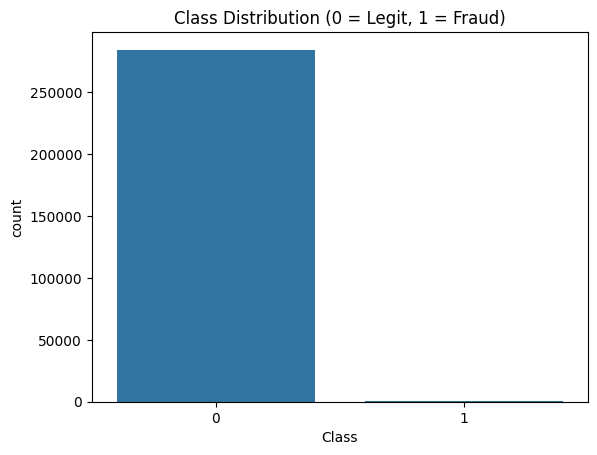

Fraudulent transactions: 0.1727%


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Class')
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.show()

fraud_percent = (df['Class'].value_counts(normalize=True)[1] * 100)
print(f"Fraudulent transactions: {fraud_percent:.4f}%")


In [15]:
# Separate fraud and legit for comparison
fraud = df[df['Class'] == 1]
legit = df[df['Class'] == 0]

print("Fraud stats:")
print(fraud[['Amount', 'Time']].describe())

print("\nLegit stats:")
print(legit[['Amount', 'Time']].describe())


Fraud stats:
            Amount           Time
count   492.000000     492.000000
mean    122.211321   80746.806911
std     256.683288   47835.365138
min       0.000000     406.000000
25%       1.000000   41241.500000
50%       9.250000   75568.500000
75%     105.890000  128483.000000
max    2125.870000  170348.000000

Legit stats:
              Amount           Time
count  284315.000000  284315.000000
mean       88.291022   94838.202258
std       250.105092   47484.015786
min         0.000000       0.000000
25%         5.650000   54230.000000
50%        22.000000   84711.000000
75%        77.050000  139333.000000
max     25691.160000  172792.000000


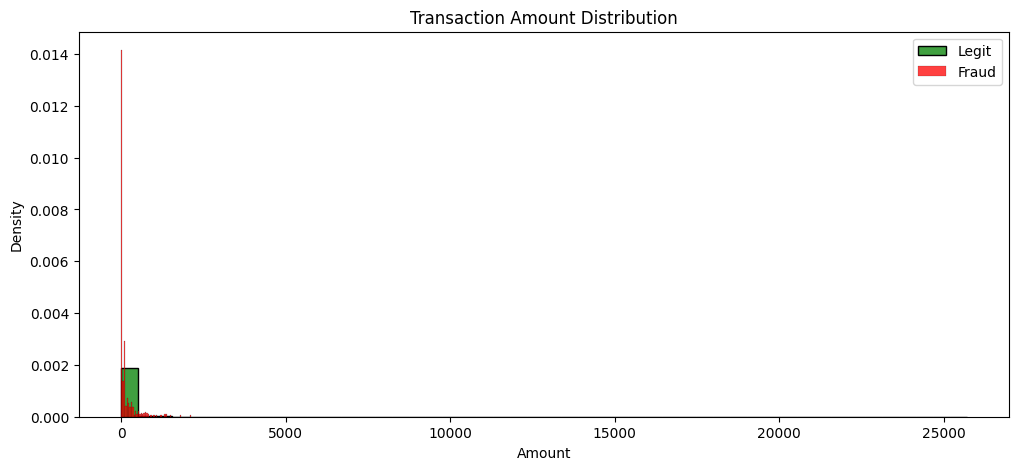

In [16]:
plt.figure(figsize=(12, 5))

# Legit
sns.histplot(legit['Amount'], bins=50, color='green', label='Legit', stat='density')
# Fraud
sns.histplot(fraud['Amount'], bins=50, color='red', label='Fraud', stat='density')
plt.legend()
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.show()


In [17]:
from sklearn.preprocessing import StandardScaler

# Copy the dataset to avoid modifying original
df_scaled = df.copy()

# Standardize 'Amount' and 'Time'
scaler = StandardScaler()
df_scaled[['Amount', 'Time']] = scaler.fit_transform(df_scaled[['Amount', 'Time']])

df_scaled.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [18]:
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (227845, 30)
Test shape: (56962, 30)


In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print("After SMOTE:\n")
print("Resampled class distribution:", y_train_resampled.value_counts())


After SMOTE:

Resampled class distribution: Class
0    227451
1    227451
Name: count, dtype: int64


In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n🧠 {model_name} Classification Report:")
    print(classification_report(y_true, y_pred, digits=4))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



🧠 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0     0.9999    0.9744    0.9869     56864
           1     0.0581    0.9184    0.1094        98

    accuracy                         0.9743     56962
   macro avg     0.5290    0.9464    0.5481     56962
weighted avg     0.9982    0.9743    0.9854     56962



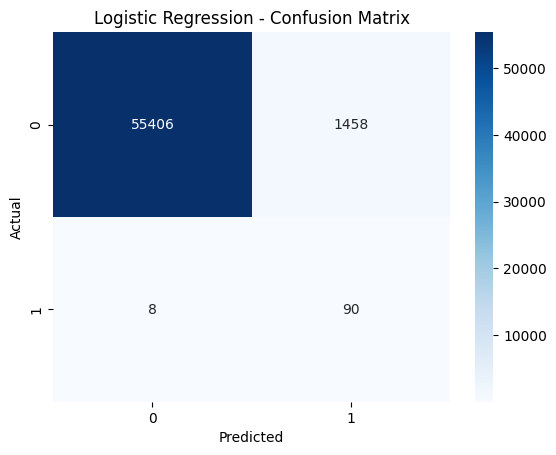

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_resampled, y_train_resampled)

y_pred_lr = lr.predict(X_test)
evaluate_model(y_test, y_pred_lr, "Logistic Regression")


In [24]:
# Reduce training set size (e.g., 20,000 samples total, balanced)
X_sampled = X_train_resampled.sample(n=20000, random_state=42)
y_sampled = y_train_resampled.loc[X_sampled.index]



🧠 Random Forest Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9979    0.9988     56864
           1     0.4163    0.8878    0.5668        98

    accuracy                         0.9977     56962
   macro avg     0.7080    0.9428    0.7828     56962
weighted avg     0.9988    0.9977    0.9981     56962



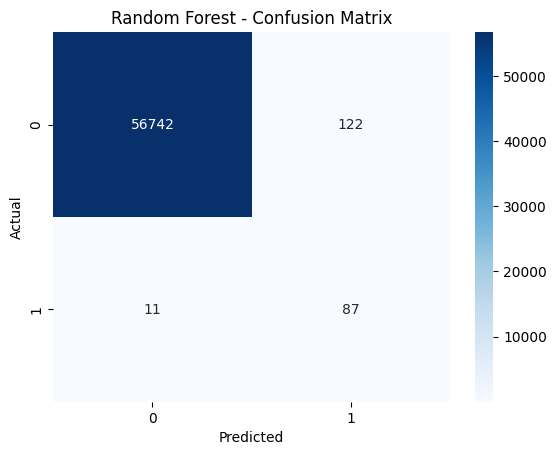

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_sampled, y_sampled)

y_pred_rf = rf.predict(X_test)
evaluate_model(y_test, y_pred_rf, "Random Forest")


🧠 KNN Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9806    0.9901     56864
           1     0.0745    0.9082    0.1377        98

    accuracy                         0.9804     56962
   macro avg     0.5372    0.9444    0.5639     56962
weighted avg     0.9982    0.9804    0.9886     56962



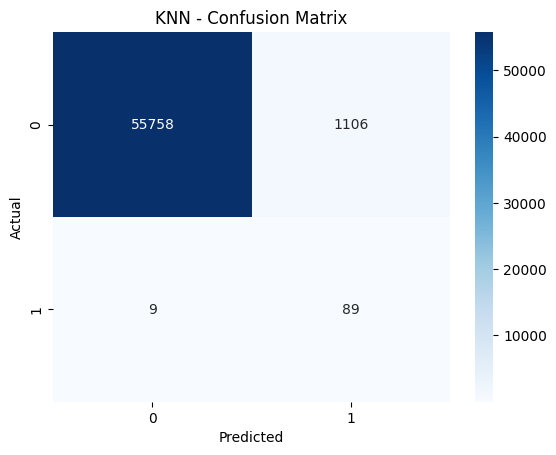

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_sampled, y_sampled)

y_pred_knn = knn.predict(X_test)
evaluate_model(y_test, y_pred_knn, "KNN")


🧠 SGD Classifier Classification Report:
              precision    recall  f1-score   support

           0     0.9999    0.9698    0.9846     56864
           1     0.0498    0.9184    0.0945        98

    accuracy                         0.9697     56962
   macro avg     0.5248    0.9441    0.5396     56962
weighted avg     0.9982    0.9697    0.9831     56962



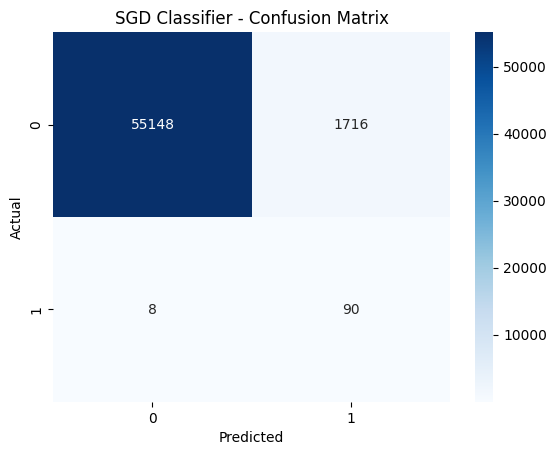

In [28]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)
sgd.fit(X_sampled, y_sampled)

y_pred_sgd = sgd.predict(X_test)
evaluate_model(y_test, y_pred_sgd, "SGD Classifier")

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l1', 'l2']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_sampled, y_sampled)

print("Best parameters:", grid.best_params_)
best_model = grid.best_estimator_


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [30]:
import numpy as np

coefficients = best_model.coef_[0]
feature_names = X.columns
top_features = sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)[:10]

for feature, coef in top_features:
    print(f"{feature}: {coef:.4f}")


Amount: 5.2851
V14: -2.3524
V20: -2.2586
V17: -2.1854
V28: 1.9774
V5: 1.8345
V16: -1.7864
V10: -1.7007
V1: 1.7001
V12: -1.6842


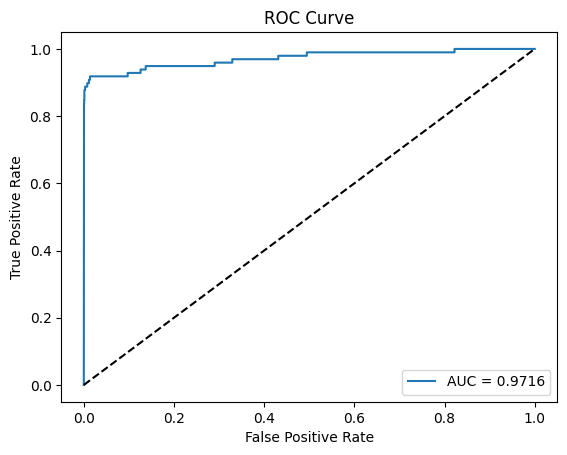

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve

y_scores = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_scores):.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [32]:
import joblib
joblib.dump(best_model, 'fraud_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']


🧠 Tuned Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0     0.9999    0.9735    0.9865     56864
           1     0.0564    0.9184    0.1063        98

    accuracy                         0.9734     56962
   macro avg     0.5281    0.9460    0.5464     56962
weighted avg     0.9982    0.9734    0.9850     56962



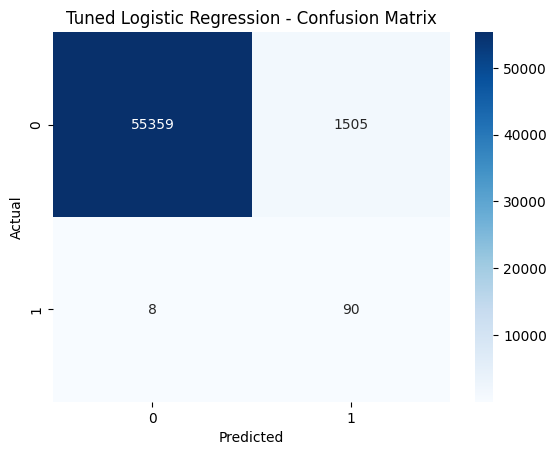

In [33]:
evaluate_model(y_test, best_model.predict(X_test), "Tuned Logistic Regression")


In [34]:
!pip install xgboost


In [35]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    scale_pos_weight=1,  # class-balanced, so no need to adjust
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_sampled, y_sampled)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:54:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)


🧠 XGBoost Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9913    0.9956     56864
           1     0.1527    0.9082    0.2614        98

    accuracy                         0.9912     56962
   macro avg     0.5762    0.9497    0.6285     56962
weighted avg     0.9984    0.9912    0.9943     56962



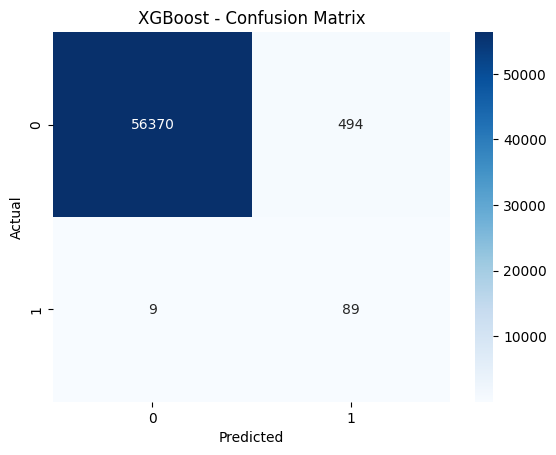

In [36]:
y_pred_xgb = xgb.predict(X_test)

evaluate_model(y_test, y_pred_xgb, "XGBoost")


In [37]:
import joblib
joblib.dump(xgb, 'xgboost_fraud_model.pkl')
joblib.dump(scaler, 'scaler.pkl')  # Reuse the same scaler


['scaler.pkl']

In [38]:
import joblib
joblib.dump(xgb, 'xgboost_fraud_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [39]:
import joblib

# Assuming 'xgb' is your trained XGBoost model
joblib.dump(xgb, 'xgboost_fraud_model.pkl')


['xgboost_fraud_model.pkl']

In [40]:
import os
os.listdir()


['.config',
 'archive (3).zip',
 'data',
 'scaler.pkl',
 'archive (3) (1).zip',
 'xgboost_fraud_model.pkl',
 'fraud_model.pkl',
 'sample_data']

In [42]:
from google.colab import files
files.download('xgboost_fraud_model.pkl')
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
import pickle
import joblib

# Load existing model from earlier pickle file
with open("xgboost_fraud_model.pkl", "rb") as f:
    model = pickle.load(f)

# Now save with joblib
joblib.dump(model, "xgboost_fraud_model.joblib")


['xgboost_fraud_model.joblib']

In [45]:
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

joblib.dump(scaler, "scaler.joblib")


UnpicklingError: STACK_GLOBAL requires str

In [46]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import joblib

# Assuming you've already loaded the dataset into 'df'
# And done preprocessing:
df = pd.read_csv("data/creditcard.csv")

# Drop 'Time' column if not needed
df = df.drop("Time", axis=1)

# Separate features and labels
X = df.drop("Class", axis=1)
y = df["Class"]

# Create and fit the scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save with joblib
joblib.dump(scaler, "scaler.joblib")


['scaler.joblib']

In [47]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import joblib

# Assuming you already have 'X_scaled' and 'y' from earlier
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, "xgboost_fraud_model.joblib")


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:30:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


['xgboost_fraud_model.joblib']

In [48]:
from google.colab import files

# Download the files
files.download("scaler.joblib")
files.download("xgboost_fraud_model.joblib")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>